In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

In [2]:
from pygam import LogisticGAM, s, f
from pygam.datasets import default

## Playground

In [3]:
X, y = default(return_X_y=True)

In [6]:
gam = LogisticGAM(f(0) + s(1) + s(2)).gridsearch(X, y)
gam

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:05
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:03
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:02
 36% (4 of 11) |#########                | Elapsed Time: 0:00:01 ETA:   0:00:01
 45% (5 of 11) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 54% (6 of 11) |#############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:01 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=f(0) + s(1) + s(2) + intercept, tol=0.0001, verbose=False)

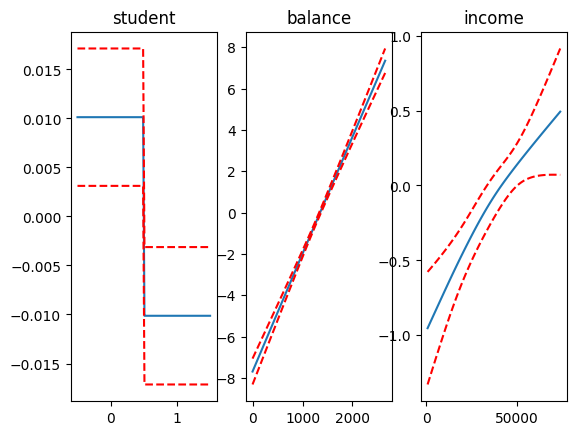

In [10]:
fig, axs = plt.subplots(1, 3)
titles = ['student', 'balance', 'income']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)

    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i]);


In [11]:
gam.accuracy(X, y)

0.9739

## Whale Data

In [12]:
df_train = pd.read_parquet("../dataset/paper2-test.parquet")
df_train.head()

,zone_id,ts,sob_mean,sob_sum,o2_mean,o2_sum,uo_mean,uo_sum,chl_mean,chl_sum,...,nppv_mean,nppv_sum,pbo_mean,pbo_sum,tob_mean,tob_sum,si_mean,si_sum,target,continent
184492,1170,2022-09-14,35.402901,424.834808,247.178192,494.356384,0.133660,1.603925,0.281907,0.563815,...,10.481349,20.962698,53.409790,640.917480,15.253552,183.042633,2.106932,4.213865,0,australia
95711,545,2022-07-23,35.318733,565.099731,228.894806,457.789612,0.120387,1.926192,0.353271,0.706542,...,9.804804,19.609608,42.582443,681.319092,19.636709,314.187347,2.842084,5.684168,1,australia
1669081,1144,2024-07-11,34.814644,557.034302,204.732193,204.732193,0.087027,1.392434,0.343167,0.343167,...,15.556914,15.556914,1719.839355,27517.429688,3.775412,60.406586,3.728522,3.728522,0,africa
1548872,1538,2023-11-07,34.746643,555.946289,201.422440,201.422440,0.309198,4.947171,0.112134,0.112134,...,3.571119,3.571119,3328.337891,53253.406250,1.379301,22.068810,3.141167,3.141167,0,africa
152732,1160,2022-08-26,35.164505,562.632080,206.091309,412.182617,-0.015524,-0.248387,0.399768,0.799536,...,17.786886,35.573772,102.341019,1637.456299,26.623756,425.980103,2.716478,5.432956,0,australia


In [14]:
X_train = df_train.drop(columns=["zone_id", "ts", "target", "country", "continent"], errors="ignore").values
y_train = df_train["target"].values

X_train.shape, y_train.shape

((367964, 42), (367964,))

In [15]:
model = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41))
model

LogisticGAM(callbacks=['deviance', 'diffs', 'accuracy'], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) + s(36) + s(37) + s(38) + s(39) + s(40) + s(41),
   tol=0.0001, verbose=False)

In [16]:
model.fit(X_train, y_train)

: 